<a href="https://colab.research.google.com/github/dudcoco/machine_deep_learning/blob/main/3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 3장 3-1
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


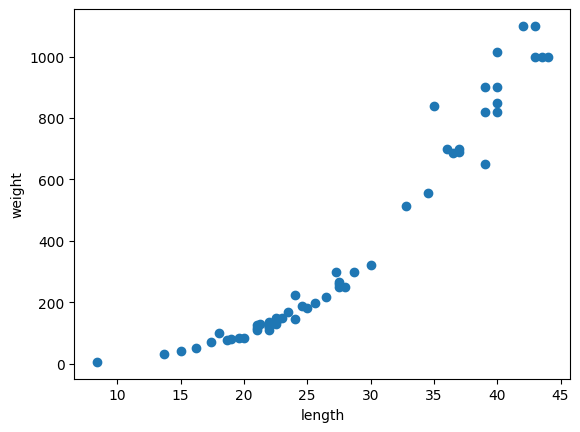

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 예시. 1차원 배열 확인하기
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
# 위의 1차원 배열을 2차원 배열로 바꿔주기
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [6]:
train_input = train_input.reshape(-1, 1) # (-1, 1) : 첫번째 원소 크기를 -1로 지정하면 나머지 원소 개수로 모두 채우라는 의미임.
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
# k 최근접 이웃 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# k 최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

# knr.score() : 결정계수. 값이 높을수록 좋음. 만약 에러율을 반환한다면 이를 음수로 만들어서 실제로는 낮은 에러가 score()메서드로 변환될때는 높은값이 되도록 바꿈

0.992809406101064


In [9]:
from sklearn.metrics import mean_absolute_error # mean_absolute_error : 타깃과 예측의 절댓값 오차를 평균하여 반환함
# 테스트 세트 예측
test_prediction = knr.predict(test_input)
# 테스트 세트 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


In [11]:
# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target))

# 결과 : 테스트 세트의 점수보다 훈련 세트의 점수가 더 낮게 나옴 (테스트 99, 훈련 96) -> 과소적합
# 테스트 점수 > 훈련 점수 or 테스트, 훈련 점수 둘 다 너무 낮음 : 과소적합
# 테스트 점수 < 훈련 점수 : 과대적합

0.9698823289099254


In [12]:
# 과소적합 해결 : 훈련 세트에 더 잘 맞게 모델 만들기. 이웃의 개수를 줄이면 됨. 기본 이웃 개수 = 5이므로 더 작은 수로 줄여보기
# 이웃 개수 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
# 결과 : 테스트 점수(99)와 훈련 점수(98)

0.9804899950518966


In [13]:
# 3-2 k 최근접 이웃의 한계
# 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))
# 결과 : 1033g으로 예측. 그러나 실제 농어의 무게는 이보다 더 많이 나간다고 함 -> 문제가 생겼다..!

[1033.33333333]


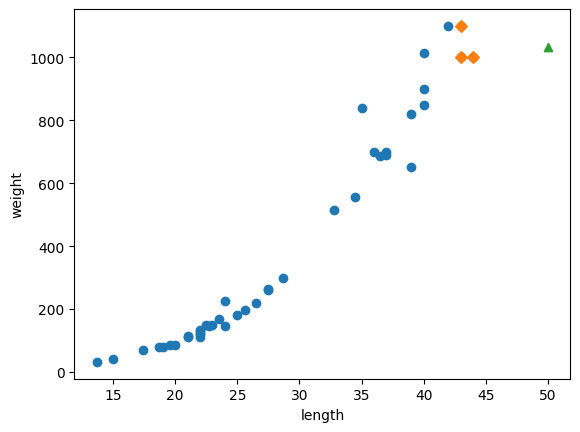

In [16]:
# 산점도 표시
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 결과 : k 최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균하므로, 새로운 샘플이 훈련세트 범위를 벗어나면 엉뚱한 값을 예측함
# 길이가 100cm인 농어의 무게도 여전히 1033으로 예측하게됨

In [17]:
# 선형 회귀 모델 구현하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [18]:
# 모델 파라미터
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


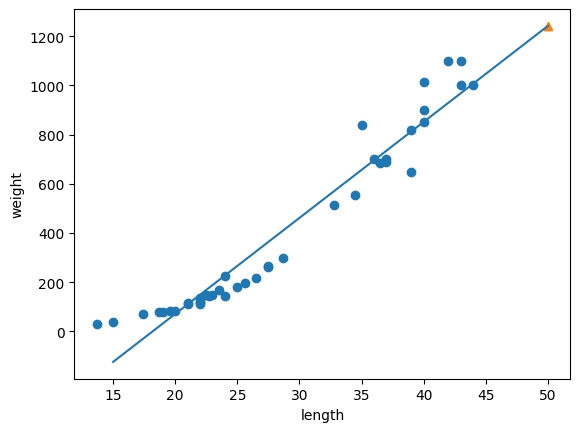

In [19]:
# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
# 훈련세트와 테스트세트의 R^2 점수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 결과 : 훈련(93), 테스트(82) 둘 다 점수가 낮은 편 -> 과소적합
# 직선에 따르면 농어의 무게가 0g 이하로 내려가게 됨..?? 있을 수 없는 일이다...
# 산점도를 보면 일직선이라기보다는 왼쪽 위로 조금 구부러진 곡선형태임 -> 최적의 직선 찾기 X 최적의 곡선 찾기 O
# 일차 방정식 형태가 아니라 이차 방정식 형태로 그래프를 그려야 함 ax^2+bx+c

0.939846333997604
0.8247503123313558


In [21]:
# 2차방정식 형태 만들기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [23]:
# 이 모델이 훈련헌 계수와 절편 출력해보기
print(lr.coef_, lr.intercept_)

# 무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05
# 위와 같은 이차방정식 그래프를 학습한 모델인 것임
# 다항식을 사용한 선형 회귀 -> 다항 회귀!
# 다항 회귀가 2차방정식으로 곡선형태라도 여전히 선형회귀임.

[  1.01433211 -21.55792498] 116.0502107827827


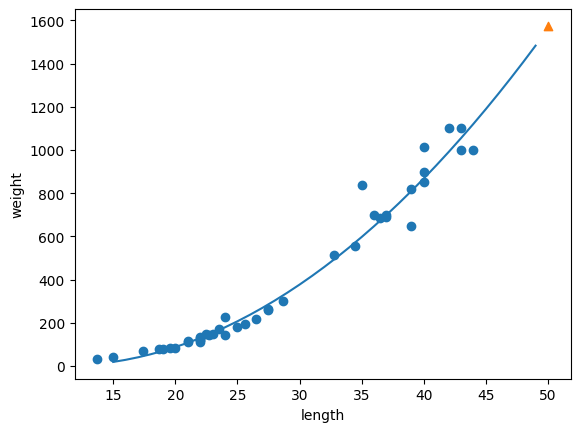

In [24]:
# 15에서 49까지의 정수 배열
point = np.arange(15, 50)

# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 이차방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [26]:
# 3-3
# 앞에서는 특성 1가지만 사용한 선형 회귀 모델을 훈련시켰지만 이번에는 특성을 여러 개 사용한 다중 회귀 모델을 훈련시킬 것
# 특성 1가지만 사용하면 직선, 2가지 사용하면 평면 형태로 표현이 됨. 3개 이상일때는.?
# 3차원 공간은 표현할수 없으므로 3개 이상일때도 평면 형태로 표현하기
# 예를 들어 길이, 높이, 두께 3가지 특성을 사용한다면, 특성을 2가지로 줄여서 평면으로 표현하기 위해 길이x높이를 새로운 특성으로 만들기
# 이렇게 기존 특성을 사용해 새로운 특성을 뽑아내는 작업 -> 특성 공학!

# csv파일에서 데이터 읽고 넘파이 배열로 변환하기
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [28]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [29]:
# 사이킷런 : 특성 만들기, 전처리 하기 위한 클래스 제공.
# 여기서 사용할 변환기는 PolynomialFeatures 클래스
from sklearn.preprocessing import PolynomialFeatures

# 2개의 특성 2와 3으로 이루어진 샘플 1개를 적용하기
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]])) # 순서 주의하기. fit() 한 후 transform()
# 결과 : 특성이 2개에서 6개로 늘어남
# 2, 3의 제곱인 4, 9가 추가되었고, 2와 3을 곱한 6이 추가되었고, 1이 추가됨
# 1은 절편을 위한 항이 됨
# but 사이킷런은 자동으로 절편을 추가하기 때문에 특성을 따로 만들 필요 없음

[[1. 2. 3. 4. 6. 9.]]


In [30]:
# include_bias = False 지정하여 다시 특성 변환하기
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [31]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
# 결과 : (42, 9) 9개의 특성이 만들어짐

(42, 9)


In [32]:
poly.get_feature_names_out() # 9개 특성이 어떤 조합으로 만들어졌는지 특성 확인

# 결과 : x0은 첫번째 특성, x0^2는 첫번째 특성의 제곱, x0 x1은 첫번쨰와 두번째 특성의 곱

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [33]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

In [35]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) # 훈련세트 점수
print(lr.score(test_poly, test_target)) # 테스트세트 점수

0.9903183436982125
0.9714559911594111


In [36]:
# 특성 더 많이 추가해보기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 결과 : (42,55)로 특성 개수가 55개임

(42, 55)


In [38]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 훈련세트 점수
print(lr.score(test_poly, test_target)) # 테스트세트 점수

# 결과 : 테스트세트 점수가 음수가 나옴.
# 특성의 개수를 늘리면 훈련 세트에 너무 과대적합 되기 때문에 테스트 세트에서는 점수가 매우 낮음

0.9999999999996433
-144.40579436844948


In [39]:
# 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것
# -> 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
# 규제를 적용하기 전 정규화를 해야 함 -> 사이킷런의 StandardScaler 클래스 사용하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용한 것
# 라쏘 : 계수의 절댓값을 기준으로 규제를 적용한 것

In [42]:
# train_scaled 데이터로 릿지 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 훈련세트 점수
print(ridge.score(test_scaled, test_target)) # 테스트세트 점수

0.9896101671037343
0.9790693977615387


In [43]:
# 릿지, 라쏘 모델 사용 시 규제 양을 임의로 조절할 수 있음 -> alpha 값으로 규제의 강도 조절
# alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도함.
# 적절한 alpha 값을 찾는 방법 -> alpha 값에 대한 R^2 값의 그래프를 그려보는 것
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련
for alpha in alpha_list:
  # 릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수, 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

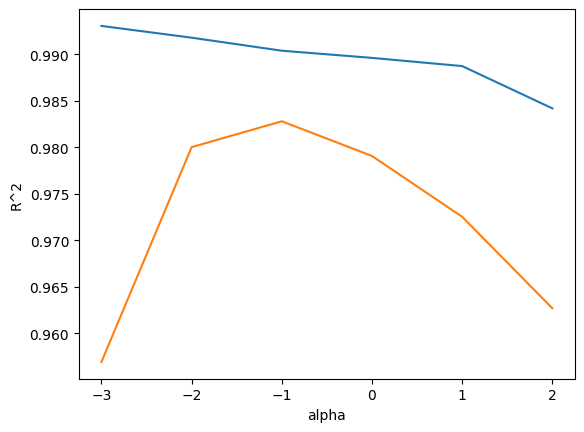

In [44]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 결과 : 위쪽_훈련세트, 아래쪽_테스트세트
# 적절한 alpha값은 두 그래프가 가장 가깝고 태스트세트 점수가 가장 높은 -1, 즉 10^-1=0.1임

In [46]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [48]:
# 라쏘 회귀 모델 만들기
# 릿지 회귀 모델과 비슷함. ridge를 lasso로 변경하면 됨
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [50]:
# alpha 값 바꿔가며 점수 계산
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만들기
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


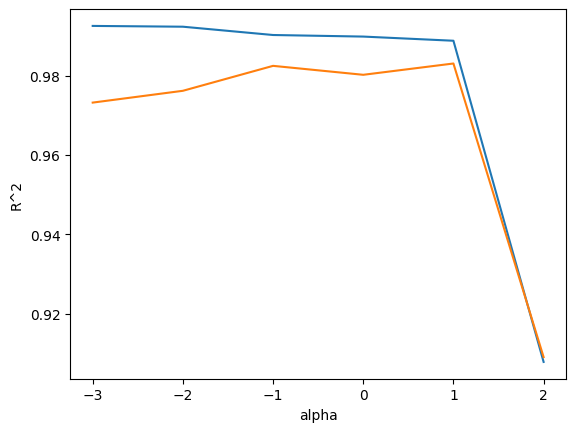

In [52]:
# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 결과 : 라쏘 모델에서 최적 alpha 값은 1, 즉 10^1=10임

In [53]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [54]:
print(np.sum(lasso.coef_ == 0)) # 특성 중 0인 계수의 개수

40
